Exploring Social Support Index in the Context of Happiness Index

Research Questions:
 1. What factors play a role in determining social support index?
    2. Is there a relationship between the geographical region of a country and social support index?
    3. Is there also a relationship between GDP per capita and social support index? How strong is it compared to cultural factors?
    4. How significant statistically is social support index in determining happiness index?
    5. How strong is the correlation between social support and happiness index in a society?

## Challenge Goals
Challenge Goals:
1. Multiple datasets: Compare this report from 2021 with the reports in 2023 and 2024
2. Statistical Hypothesis Testing: Testing the following hypothesis:
   H_null: There is no difference in Happiness Index across countries with similar GDP per capita but higher social support index 
   H_alternative: The Happiness Index of countries with higher social support index is higher, assuming similar GDP per capita level
   this hypothesis testing is to be conducted under the alpha level of 0.01

## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [2]:

%pip install kagglehub
%pip install hypothesis

  Using cached kagglehub-0.3.13-py3-none-any.whl.metadata (38 kB)
Using cached kagglehub-0.3.13-py3-none-any.whl (68 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.6/535.6 kB 12.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
your_name = "Andy Zhang"
sources = [" https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021",
    "https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023",
    "https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024",
    "https://hypothesis.readthedocs.io/en/latest/",
    "data-visualization.ipynb",
    "geospatial-data.ipynb"
]
#importing libraries
from sklearn.linear_model import LinearRegression
import doctest
import csv
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
from hypothesis import given, strategies as st
assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"


In [4]:
path_2021 = "NEW_COURSE_MATERIALS/projects/world-happiness-report-2021.csv"
path_2023 = "NEW_COURSE_MATERIALS/projects/WHR2023.csv"
path_2024 = "NEW_COURSE_MATERIALS/projects/WHR2024.csv"
# task 1: reading in the data, data cleaning 
file_2021 = pd.read_csv('world-happiness-report-2021.csv')
file_2023 = pd.read_csv('WHR2023.csv')
file_2024 = pd.read_csv('WHR2024.csv')



assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

In [16]:
def file_analysis (file_path):
    """
    >>> file_analysis(file_2021)
    'the file has 149 rows and 20 columns'
    >>> file_analysis(file_2023)
    'the file has 137 rows and 19 columns'
    >>> file_analysis(file_2024)
    'the file has 143 rows and 11 columns'
    
    This function returns the size of the file in terms of how many rows and columns it has.
    """
    num_rows = len(file_path)
    num_cols = len(file_path.loc[0])
    return f"the file has {num_rows} rows and {num_cols} columns"
file_analysis(file_2021)

doctest.run_docstring_examples(file_analysis, globals())

In [17]:
def missing_value (file_path):
    """
    This function returns the number of NaN values present each column
    >>> missing_value (file_2021)
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
     
    >>> missing_value (file_2023)
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
    
    >>> missing_value (file_2024)
    [0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3]
    """
    # return the percentage of missing data, and show all missing data
    # data cleaning: if data is empty change it to NaN
    file_path.replace("",np.NaN)
    missing_data = file_path.isna().sum()
    return missing_data.tolist()

doctest.run_docstring_examples(missing_value, globals())

In [ ]:
def summary_statistics (data2021, data2023, data2024):
    """
    this function generates the summary statistics from the different datasets,
    including dataset size, any missing data, and variables of interest
    >>> summary_statistics(data2021, data2023, data2024)
    
    """
    summary_2021 = file_2021.describe()
    summary_2023 = file_2023.describe()
    summary_2024 = file_2024.describe()
    return {
        "2021" : summary_2021,
        "2023" : summary_2023,
        "2024" : summary_2024
    }

doctest.run_docstring_examples(summary_statistics, globals())

In [21]:
def variable_summary (data_file):
    """
    This function generates summary statistics for the relevant variables in the dataset
    >>> idx_sum, soc_sum, gdp_sum = variable_summary(file_2021)
    >>> round(idx_sum['mean'],3)
    5.533
    >>> round(soc_sum['mean'],3)
    0.815
    >>> round(gdp_sum['mean'],3)
    9.432
    """
    happiness_index_summary = data_file["Ladder score"].describe()
    social_support_index_sum = data_file["Social support"].describe()
    gdp_per_capita_sum = data_file["Logged GDP per capita"].describe()
    return [happiness_index_summary,social_support_index_sum,gdp_per_capita_sum]
    
doctest.run_docstring_examples(variable_summary, globals())

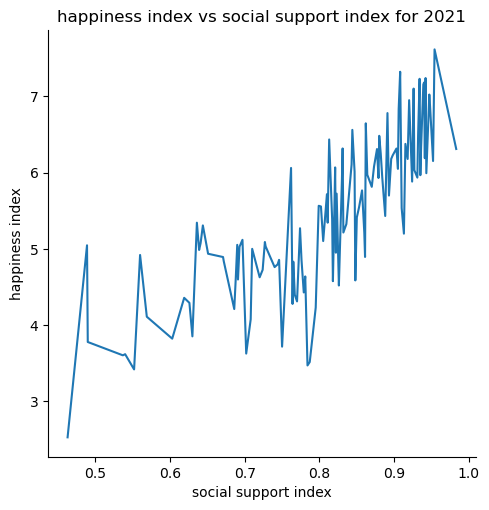

In [9]:
def lineplot1 (data_file, year):
    """
    This function generates a line plot showing the relationship between happiness index and social support index
    """
    plot_data = data_file.loc[slice(None),["Social support","Ladder score"]]
    plot = sns.relplot(data = plot_data, x = "Social support",y = "Ladder score",kind = "line",errorbar = None)
    plot.set(xlabel ="social support index" , ylabel= "happiness index",title=f"happiness index vs social support index for {year}")
    return plot

lineplot1(file_2021,2021)

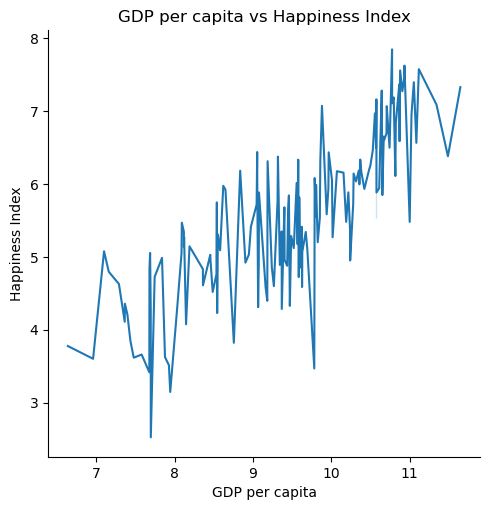

In [11]:
def lineplot2 (data_file):
    """
    This function generates a line plot showing the relationship between happiness index and GDP per capita
    """
    plot_data = data_file.loc[slice(None),["Logged GDP per capita","Ladder score"]]
    plot = sns.relplot(data = plot_data, x="Logged GDP per capita",y="Ladder score",kind="line")
    plot.set(xlabel = "GDP per capita", ylabel = "Happiness Index",title = "GDP per capita vs Happiness Index")
    return plot

lineplot2(file_2021)

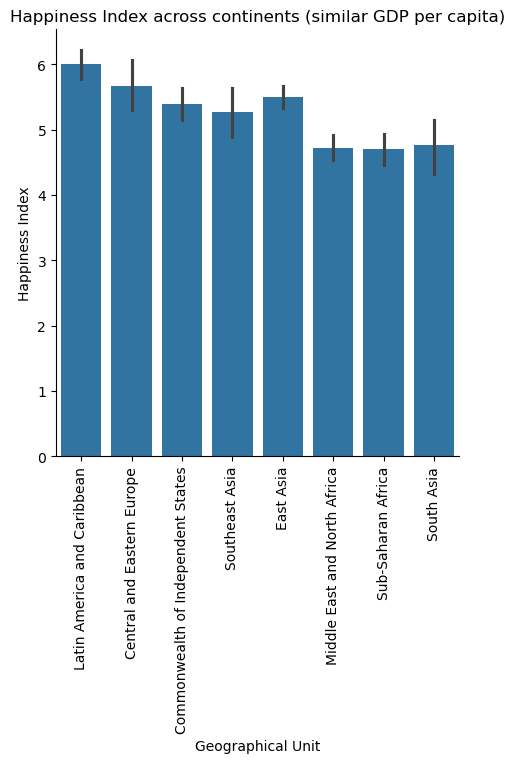

In [21]:
def geocatplot(data_file, gdp_min,gdp_max):
    """
    This function generates a bar plot that compares the happiness index of countries across different geographical units
    with similar GDP per capita
    """
    gdp_filter = (data_file["Logged GDP per capita"] >= gdp_min) & (data_file["Logged GDP per capita"] <= gdp_max)
    plot_data = data_file.loc[gdp_filter,["Regional indicator","Ladder score"]]
    plot = sns.catplot(data=plot_data, x="Regional indicator", y="Ladder score", kind = "bar")
    plot.set(xlabel = "Geographical Unit", ylabel="Happiness Index" ,title="Happiness Index across continents (similar GDP per capita)")
    plot.tick_params(axis='x', rotation=90)
    return plot
geocatplot(file_2021, 8, 10)

## Data Setting and Methods


In [ ]:
"""
description: the datasets contain the following columns: 
Ladder score: this is the happiness index of a specific country
GDP per capita: this is the GDP per capita of a specific country


data transformations: replaced null values with NaN
methods: using 
"""

In [ ]:
def hypothesis_testing():
    
    

## Results

*Replace this text with your results. This section tends to be one of the longer sections of the notebook. Be sure to create new code cells and new Markdown text cells with additional subheadings to explain and break-up longer snippets of code into a more readable format.*

1. *Present and discuss your research results. Treat each of your research questions separately. Include additional discussions for results that are most interesting, surprising, or important.*
2. *Interpret the results. If the answers are unexpected, try to offer an explanation. A good report not only presents the results, but also provides an argument or interpretation based on the data analysis.*
3. *Include any visualizations you have made. In general, these should be generated by your Python code. If you plotted by hand or other software, explain why it was not possible to create the plot you wanted in Python and what you tried.*

*As with assessments, documentation and testing are required. Automated tests must be written in Python using small, manually-verifiable data.*

## write-up
1. the result shows that happiness index is correlated positively with both social support index and gdp per capita
2. the result shows that social support index has a 

## Implications and Limitations

*Replace this text with your analysis. Who might benefit from your analysis and who might be excluded or otherwise harmed by it? What about the data setting might have impacted your results? Explain at least 3 limitations of your analysis and how others should or shouldn't be advised to use your conclusions. You may remove the code cell below if you don't need it.*

In [ ]:
There will clearly be some confouding around gdp per capita vs geographical region 